Item based filtering

In [1]:
!pip install numpy==1.23.5

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install numexpr --upgrade
!pip install bottleneck --upgrade
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.2 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from thefuzz import process

# Load the data
ratings = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT/movies.csv')
movies = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT/ratings.csv')

In [12]:
 ratings.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
movies.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
ratings = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT/ratings.csv')
movies = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT/movies.csv')
print(ratings.columns)
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

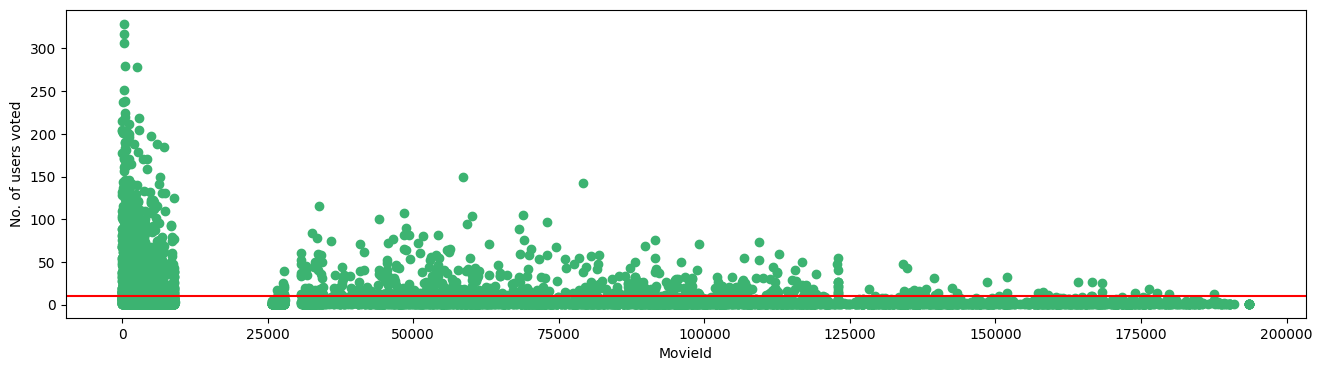

In [21]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [22]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

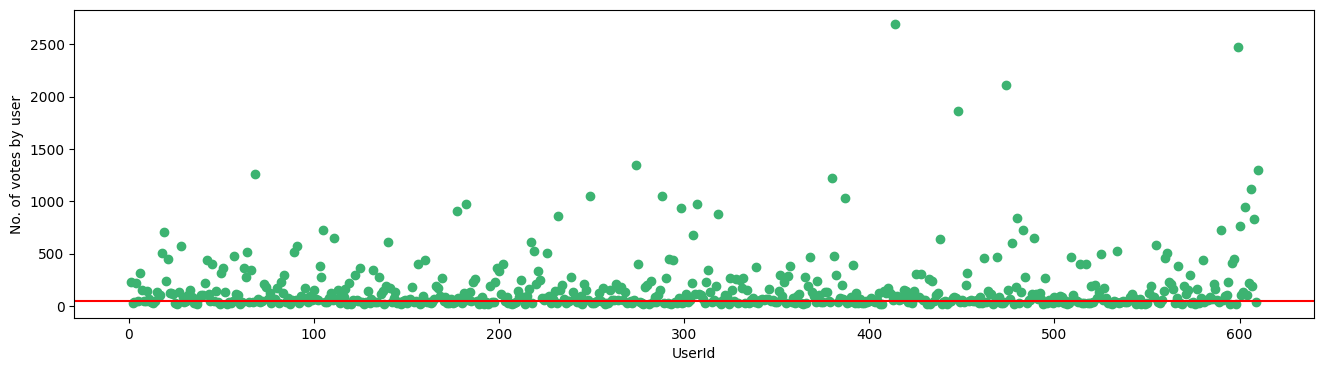

In [23]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [24]:
 final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [26]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [27]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [28]:
 knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [29]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [30]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name, case=False)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        #movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        # Add this check to ensure there is a matching index in final_dataset
        matching_indices = final_dataset[final_dataset['movieId'] == movie_idx].index
        if matching_indices.empty:
            return "No matching movieId found in final_dataset."

        movie_idx = matching_indices[0]


        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                                key=lambda x: x[1])[:0:-1]

        recommend_frame = []

        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [32]:
# Compute item-item similarity matrix using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(final_dataset.values)
item_similarity_df = pd.DataFrame(item_similarity, index=final_dataset.index, columns=final_dataset.index)


In [33]:
# Function to get the closest match for the movie title
def get_closest_title(input_title):
    titles = movies['title'].tolist()
    closest_match = process.extractOne(input_title, titles)
    return closest_match[0]

# Function to plot recommended movies using Nearest Neighbors
def plot_recommended_movies_knn(movie_title, num_recommendations=10):
    recommendations_df = get_movie_recommendation(movie_title)

    if isinstance(recommendations_df, str):
        print(recommendations_df)
        return

    recommendations_df = recommendations_df.head(num_recommendations)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Distance', y='Title', data=recommendations_df, palette='viridis')
    plt.title(f'Recommended Movies for "{movie_title}"')
    plt.xlabel('Distance')
    plt.ylabel('Movie Title')
    plt.show()



In [34]:
get_movie_recommendation('pride and prejudice')

'No matching movieId found in final_dataset.'

In [35]:
get_movie_recommendation('matrix')

,Title,Distance
1,American Beauty (1999),0.317485
2,"Lord of the Rings: The Return of the King, The...",0.315480
3,Gladiator (2000),0.314059
4,"Lord of the Rings: The Fellowship of the Ring,...",0.313934
5,"Sixth Sense, The (1999)",0.291110
6,Saving Private Ryan (1998),0.286910
7,Star Wars: Episode IV - A New Hope (1977),0.277609
8,Star Wars: Episode VI - Return of the Jedi (1983),0.275656
9,Star Wars: Episode V - The Empire Strikes Back...,0.254011
10,Fight Club (1999),0.229824


<ipython-input-33-778b2e610399>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distance', y='Title', data=recommendations_df, palette='viridis')


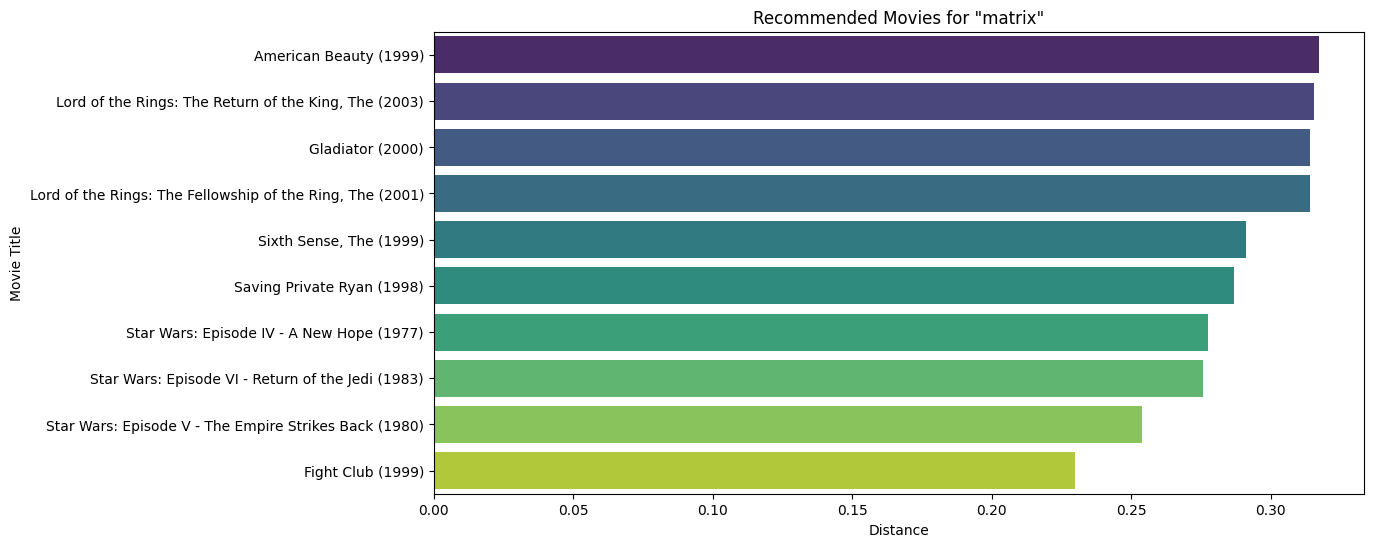

In [36]:
plot_recommended_movies_knn('matrix', num_recommendations=10)

In [37]:
get_movie_recommendation('gladiator')

,Title,Distance
1,Star Wars: Episode VI - Return of the Jedi (1983),0.393239
2,Pirates of the Caribbean: The Curse of the Bla...,0.386640
3,"Lord of the Rings: The Return of the King, The...",0.368131
4,Ocean's Eleven (2001),0.365264
5,Saving Private Ryan (1998),0.361474
6,"Lord of the Rings: The Two Towers, The (2002)",0.359267
7,"Bourne Identity, The (2002)",0.359122
8,Fight Club (1999),0.353802
9,"Lord of the Rings: The Fellowship of the Ring,...",0.328321
10,"Matrix, The (1999)",0.314059


Collaborative filtering using implicit feedback

<ipython-input-33-778b2e610399>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distance', y='Title', data=recommendations_df, palette='viridis')


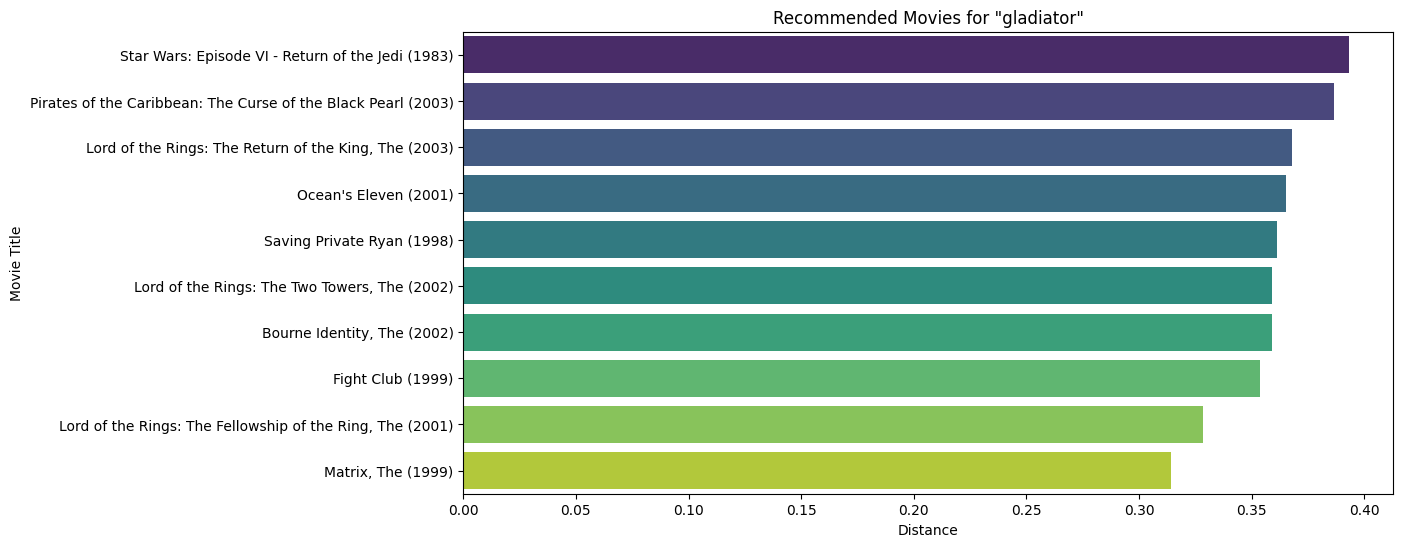

In [38]:
plot_recommended_movies_knn('gladiator', num_recommendations=10)